## Lesson 1

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [2]:
tokenizer = Tokenizer()

data = "In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [3]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i + 1]
        input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len, padding = "pre"))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=  total_words)

In [4]:
print(tokenizer.word_index["in"])
print(tokenizer.word_index["the"])
print(tokenizer.word_index["town"])
print(tokenizer.word_index["of"])
print(tokenizer.word_index["athy"])
print(tokenizer.word_index["one"])
print(tokenizer.word_index["jeremy"])
print(tokenizer.word_index["lanigan"])

4
2
66
8
67
68
69
70


In [5]:
print(xs[5])
print(ys[5])
print(xs[6])
print(ys[6])

[ 0  0  0  0  4  2 66  8 67 68]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 0  0  0  4  2 66  8 67 68 69]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [6]:
print(tokenizer.word_index)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [7]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length = max_sequence_len - 1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation = "softmax"))
model.compile(loss = "categorical_crossentropy", 
              optimizer = "adam", 
              metrics = ["accuracy"])
history = model.fit(xs, ys, epochs = 500, verbose = 1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 453 samples
Epoch 1/500
453/453 [==============================] - 2s 5ms/sample - loss: 5.5692 - accuracy: 0.0353
Epoch 2/500
453/453 [==============================] - 0s 325us/sample - loss: 5.5452 - accuracy: 0.0508
Epoch 3/500
453/453 [==============================] - 0s 441us/sample - loss: 5.4888 - accuracy: 0.0508
Epoch 4/500
453/453 [==============================] - 0s 457us/sample - loss: 5.3109 - accuracy: 0.0508
Epoch 5/500
453/453 [==============================] - 0s 344us/sample - loss: 5.1238 - accuracy: 0.0508
Epoch 6/500
453/453 [==============================] - 0s 334us/sample - loss: 5.0640 - accuracy: 0.0508
Epoch 7/500
453/453 [==============================] - 0s 354us/sample - loss: 5.0218 - accuracy: 0.0508
Epoch 8/500
453/453 [==============================] - 0s 410us/sample - loss: 4.9897 - accuracy: 0.0508
Epoch 9/500
453/453 [==========================

453/453 [==============================] - 0s 474us/sample - loss: 3.2859 - accuracy: 0.2936
Epoch 47/500
453/453 [==============================] - 0s 613us/sample - loss: 3.2437 - accuracy: 0.3046
Epoch 48/500
453/453 [==============================] - 0s 520us/sample - loss: 3.2066 - accuracy: 0.3135
Epoch 49/500
453/453 [==============================] - 0s 442us/sample - loss: 3.1679 - accuracy: 0.3179
Epoch 50/500
453/453 [==============================] - 0s 389us/sample - loss: 3.1367 - accuracy: 0.3422
Epoch 51/500
453/453 [==============================] - 0s 350us/sample - loss: 3.1090 - accuracy: 0.3422
Epoch 52/500
453/453 [==============================] - 0s 415us/sample - loss: 3.0820 - accuracy: 0.3422
Epoch 53/500
453/453 [==============================] - 0s 716us/sample - loss: 3.0577 - accuracy: 0.3510
Epoch 54/500
453/453 [==============================] - 0s 439us/sample - loss: 3.0330 - accuracy: 0.3731
Epoch 55/500
453/453 [==============================] - 0s 

453/453 [==============================] - 0s 573us/sample - loss: 1.4931 - accuracy: 0.7483
Epoch 124/500
453/453 [==============================] - 0s 344us/sample - loss: 1.4801 - accuracy: 0.7528
Epoch 125/500
453/453 [==============================] - 0s 514us/sample - loss: 1.4642 - accuracy: 0.7638
Epoch 126/500
453/453 [==============================] - 0s 391us/sample - loss: 1.4521 - accuracy: 0.7550
Epoch 127/500
453/453 [==============================] - 0s 345us/sample - loss: 1.4381 - accuracy: 0.7550
Epoch 128/500
453/453 [==============================] - 0s 331us/sample - loss: 1.4271 - accuracy: 0.7660
Epoch 129/500
453/453 [==============================] - 0s 345us/sample - loss: 1.4160 - accuracy: 0.7550
Epoch 130/500
453/453 [==============================] - 0s 350us/sample - loss: 1.3975 - accuracy: 0.7682
Epoch 131/500
453/453 [==============================] - 0s 349us/sample - loss: 1.3844 - accuracy: 0.7748
Epoch 132/500
453/453 [============================

453/453 [==============================] - 0s 343us/sample - loss: 0.7274 - accuracy: 0.9051
Epoch 200/500
453/453 [==============================] - 0s 523us/sample - loss: 0.7191 - accuracy: 0.9051
Epoch 201/500
453/453 [==============================] - 0s 369us/sample - loss: 0.7154 - accuracy: 0.9117
Epoch 202/500
453/453 [==============================] - 0s 345us/sample - loss: 0.7078 - accuracy: 0.9117
Epoch 203/500
453/453 [==============================] - 0s 361us/sample - loss: 0.7002 - accuracy: 0.9183
Epoch 204/500
453/453 [==============================] - 0s 424us/sample - loss: 0.6952 - accuracy: 0.9205
Epoch 205/500
453/453 [==============================] - 0s 401us/sample - loss: 0.6897 - accuracy: 0.9205
Epoch 206/500
453/453 [==============================] - 0s 393us/sample - loss: 0.6825 - accuracy: 0.9227
Epoch 207/500
453/453 [==============================] - 0s 342us/sample - loss: 0.6766 - accuracy: 0.9249
Epoch 208/500
453/453 [============================

453/453 [==============================] - 0s 477us/sample - loss: 0.3953 - accuracy: 0.9448
Epoch 276/500
453/453 [==============================] - 0s 344us/sample - loss: 0.3900 - accuracy: 0.9448
Epoch 277/500
453/453 [==============================] - 0s 330us/sample - loss: 0.3863 - accuracy: 0.9426
Epoch 278/500
453/453 [==============================] - 0s 317us/sample - loss: 0.3821 - accuracy: 0.9448
Epoch 279/500
453/453 [==============================] - 0s 332us/sample - loss: 0.3787 - accuracy: 0.9470
Epoch 280/500
453/453 [==============================] - 0s 379us/sample - loss: 0.3774 - accuracy: 0.9404
Epoch 281/500
453/453 [==============================] - 0s 511us/sample - loss: 0.3740 - accuracy: 0.9426
Epoch 282/500
453/453 [==============================] - 0s 337us/sample - loss: 0.3692 - accuracy: 0.9426
Epoch 283/500
453/453 [==============================] - 0s 329us/sample - loss: 0.3645 - accuracy: 0.9448
Epoch 284/500
453/453 [============================

453/453 [==============================] - 0s 415us/sample - loss: 0.2348 - accuracy: 0.9492
Epoch 352/500
453/453 [==============================] - 0s 347us/sample - loss: 0.2344 - accuracy: 0.9470
Epoch 353/500
453/453 [==============================] - 0s 474us/sample - loss: 0.2332 - accuracy: 0.9514
Epoch 354/500
453/453 [==============================] - 0s 348us/sample - loss: 0.2308 - accuracy: 0.9426
Epoch 355/500
453/453 [==============================] - 0s 327us/sample - loss: 0.2288 - accuracy: 0.9492
Epoch 356/500
453/453 [==============================] - 0s 320us/sample - loss: 0.2306 - accuracy: 0.9470
Epoch 357/500
453/453 [==============================] - 0s 323us/sample - loss: 0.2286 - accuracy: 0.9470
Epoch 358/500
453/453 [==============================] - 0s 456us/sample - loss: 0.2273 - accuracy: 0.9470
Epoch 359/500
453/453 [==============================] - 0s 378us/sample - loss: 0.2251 - accuracy: 0.9426
Epoch 360/500
453/453 [============================

453/453 [==============================] - 0s 479us/sample - loss: 0.1639 - accuracy: 0.9492
Epoch 428/500
453/453 [==============================] - 0s 361us/sample - loss: 0.1628 - accuracy: 0.9514
Epoch 429/500
453/453 [==============================] - 0s 308us/sample - loss: 0.1625 - accuracy: 0.9536
Epoch 430/500
453/453 [==============================] - 0s 317us/sample - loss: 0.1620 - accuracy: 0.9536
Epoch 431/500
453/453 [==============================] - 0s 339us/sample - loss: 0.1614 - accuracy: 0.9470
Epoch 432/500
453/453 [==============================] - 0s 418us/sample - loss: 0.1601 - accuracy: 0.9492
Epoch 433/500
453/453 [==============================] - 0s 324us/sample - loss: 0.1605 - accuracy: 0.9470
Epoch 434/500
453/453 [==============================] - 0s 333us/sample - loss: 0.1600 - accuracy: 0.9514
Epoch 435/500
453/453 [==============================] - 0s 323us/sample - loss: 0.1602 - accuracy: 0.9514
Epoch 436/500
453/453 [============================

In [8]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

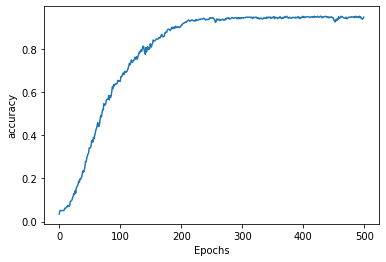

In [9]:
plot_graphs(history, "accuracy")

In [10]:
seed_text = "Laurence went to dublin"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen = max_sequence_len - 1, padding = 'pre')
    predicted = model.predict_classes(token_list, verbose = 0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Laurence went to dublin round as nolans ructions up hearty the table rose forget old old hall hall hall glisten glisten glisten polkas glisten polkas glisten sure hearty hearty hearty gave mavrone up all hearty hearty hearty a rose cask cask phelim cask odaly be glisten glisten mchugh glisten odaly runctions sweetheart introduction milliner milliner ned mcgilligan hall glisten mchugh glisten pipes milliner milliner milliner pipes old hall odaly phelim mchugh mchugh mchugh glisten mchugh glisten glisten polkas odaly runctions hearty hearty ground gave mavrone up all they mavrone me a rose rose rose forget dublin up wall ground ground ground hearty ground ground


## Lesson 2

In [11]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [12]:
!/miniconda3/envs/tensorflow/bin/wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2019-09-14 17:33:20--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com... 172.217.15.80
Connecting to storage.googleapis.com|172.217.15.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: '/tmp/irish-lyrics-eof.txt'

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.03s   

2019-09-14 17:33:21 (2.44 MB/s) - '/tmp/irish-lyrics-eof.txt' saved [68970/68970]



In [13]:
tokenizer = Tokenizer()

data = open("/tmp/irish-lyrics-eof.txt").read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [14]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len, padding = "pre"))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes = total_words)

In [15]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [16]:
print(xs[5])
print(ys[5])
print(xs[6])
print(ys[6])

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
[0. 0. 0. ... 0. 0. 0.]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
[0. 0. 0. ... 0. 0. 0.]


In [17]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [18]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length = max_sequence_len - 1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation = "softmax"))
adam = Adam(lr = 0.01)
model.compile(loss = "categorical_crossentropy", optimizer = adam, metrics = ["accuracy"])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs = 100, verbose = 1)
#print model.summary()
print(model)

Train on 12038 samples
Epoch 1/100
12038/12038 [==============================] - 22s 2ms/sample - loss: 6.6498 - accuracy: 0.0732
Epoch 2/100
12038/12038 [==============================] - 19s 2ms/sample - loss: 5.7705 - accuracy: 0.1154
Epoch 3/100
12038/12038 [==============================] - 19s 2ms/sample - loss: 4.8858 - accuracy: 0.1649
Epoch 4/100
12038/12038 [==============================] - 17s 1ms/sample - loss: 3.9606 - accuracy: 0.2319
Epoch 5/100
12038/12038 [==============================] - 17s 1ms/sample - loss: 3.0922 - accuracy: 0.3389
Epoch 6/100
12038/12038 [==============================] - 17s 1ms/sample - loss: 2.3952 - accuracy: 0.4574
Epoch 7/100
12038/12038 [==============================] - 18s 1ms/sample - loss: 1.8890 - accuracy: 0.5577
Epoch 8/100
12038/12038 [==============================] - 16s 1ms/sample - loss: 1.5226 - accuracy: 0.6350
Epoch 9/100
12038/12038 [==============================] - 16s 1ms/sample - loss: 1.3092 - accuracy: 0.6850
Epoch

Epoch 48/100
12038/12038 [==============================] - 16s 1ms/sample - loss: 0.9635 - accuracy: 0.7414
Epoch 49/100
12038/12038 [==============================] - 16s 1ms/sample - loss: 0.8855 - accuracy: 0.7647
Epoch 50/100
12038/12038 [==============================] - 16s 1ms/sample - loss: 0.8333 - accuracy: 0.7782
Epoch 51/100
12038/12038 [==============================] - 16s 1ms/sample - loss: 0.8319 - accuracy: 0.7780
Epoch 52/100
12038/12038 [==============================] - 17s 1ms/sample - loss: 0.8267 - accuracy: 0.7779
Epoch 53/100
12038/12038 [==============================] - 16s 1ms/sample - loss: 0.7987 - accuracy: 0.7846
Epoch 54/100
12038/12038 [==============================] - 16s 1ms/sample - loss: 0.7606 - accuracy: 0.7973
Epoch 55/100
12038/12038 [==============================] - 16s 1ms/sample - loss: 0.7382 - accuracy: 0.8024
Epoch 56/100
12038/12038 [==============================] - 16s 1ms/sample - loss: 0.7995 - accuracy: 0.7866
Epoch 57/100
12038/

In [19]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

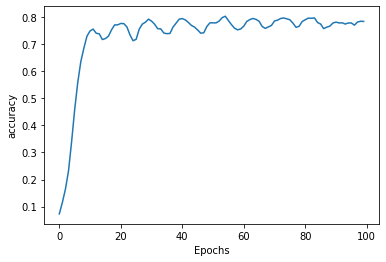

In [20]:
plot_graphs(history, "accuracy")

In [21]:
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen = max_sequence_len - 1, padding = "pre")
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

I've got a bad feeling about this they till the bride by my heart of my breast for your love forever like me was a policeman for sayin now white feet or bride by a playing peek a tender beaming smile my word de dow corporal casey a spring in a fair along me stick thee come see their cursed as to change out his money and it on a little snow white feet or cloak again now each chance i decay its world it love no beggarman a life of light she love on me clothes he bore may heavens there im fathers in ringlets hills
